## 数据可视化
---

在数据分析的过程中，可视化是一种非常关键的技巧。通过图形化的方式将数据呈现出来，可以极大地提高问题的清晰度，降低分析的难度。

**安装 Python 的绘图模块**
```bash
python -m pip install -U matplotlib
```

**下面是一个绘图程序的例子：**

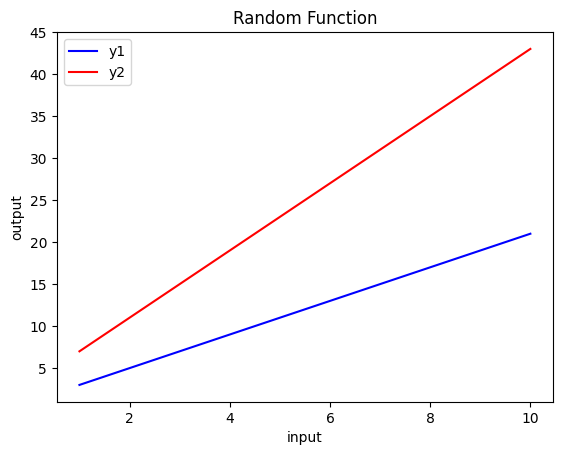

In [1]:
import matplotlib.pyplot as plt   # import python plot 库

# x, y 轴各自的数据序列
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [(n * 2 + 1) for n in x]
y2 = [(n * 4 + 3) for n in x]

# 加入坐标轴标签和图形的标题
plt.title("Random Function")
plt.xlabel("input")
plt.ylabel("output")

# 每次调用 plot 函数绘制出一条曲线
# 参数中可以指定本次绘制曲线的 label
plt.plot(x, y1, "-b", label="y1")    # “-b” 代表蓝色
plt.plot(x, y2, color='red', label="y2")
# 还能写作 plt.plot(x, y, c='blue', label="sine")
# 还能写作 plt.plot(x, y, color='red', label="cosine")

# legend 可以指定是否在图形上显示每条线的 label
plt.legend(loc="upper left")
plt.show()

**下面的例子程序展示 numpy 和 matplotlib 合用**

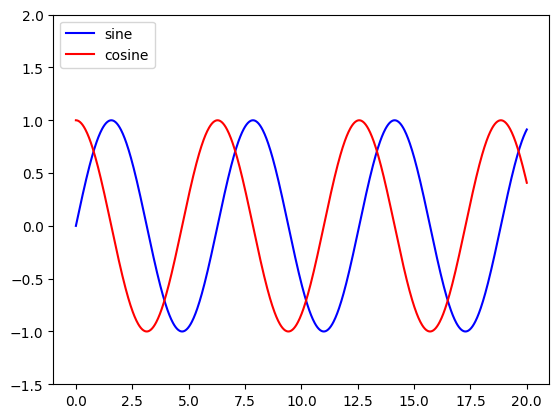

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 20, 1000) # 在 0~20 之间线性地生成 1000 个数字
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, "-b", label="sine")    # “-b” 代表蓝色
plt.plot(x, y2, "-r", label="cosine")  # 其中 “-r” 代表红色
# 还能写作 plt.plot(x, y1, c='blue', label="sine")
# 还能写作 plt.plot(x, y2, color='red', label="cosine")

plt.legend(loc="upper left")
plt.ylim(-1.5, 2.0)
plt.show()

## PyTorch 深度学习的基本流程
---
PyTorch 深度学习的一般流程如下：
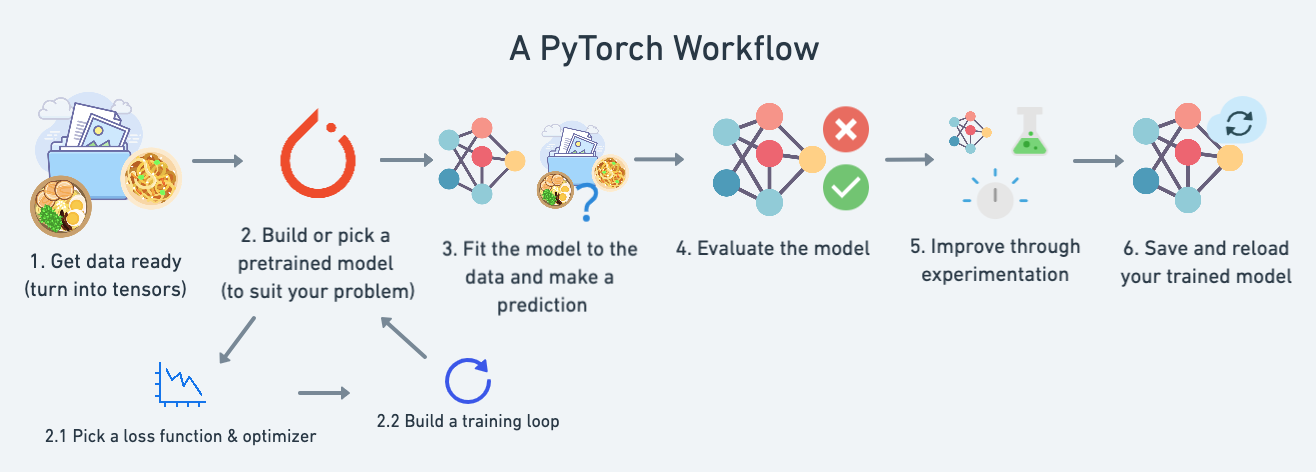

PyTorch 为每个阶段提供了相应的对象。对于神经网络，PyTorch 提供了 `torch.nn`，其中包含了实现神经网络所需的各种基础对象。

In [3]:
import torch
from torch import nn             # 神经网络支持库
import matplotlib.pyplot as plt  # 用于数据的可视化


"""
下面的代码用于检测硬件平台是否支持 CUDA 或者 MPS（Mac) GPU 加速，
并将检测的结果保存到 dev 全局变量，后续训练过程中可以使用。
"""
dev = "mps" if torch.has_mps else "cuda" if torch.has_cuda else "cpu"
print(f"Using device '{dev}'")

Using device 'mps'


上面的代码检查平台是否支持 GPU 加速。很幸运的是，在 mac 平台上已经通过 MPS（Metal Performance Shaders）支持 GPU 加速。MPS 加速使得 Training 和 Testing 的速度比 CPU 提高了数十倍。

### 1. Get data ready

In [4]:
"""
1. Get data ready - 准备训练数据并转化为 PyTorch 能够理解的 Tensor 类型。
                    本例中使用线性函数生成数据，在后续的训练过程中使用深度学习进行线性回归。
"""

# 线性函数的原型为 y = weight * x + bias，我们先构造出一个原始的线性函数来生成数据
weight = 0.7
bias = 0.3

# 使用 torch 的相关函数生成 tensor
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

上述的代码使用线性函数 `y = ax + b` 生产了一系列**结果**数据。这些数据将会被送入神经网络进行训练和验证。
注意，代码中直接给定了线性函数的 weight 和 bias 两个参数，这是为了产生数据的需要。而在真实的神经网络训练过程中则只有数据而没有参数，训练的目的就是找到最接近真实的参数，尽量还原原始的函数。

`torch.arrange` 函数按一定的补偿自动生成一个 1-D 的数字序列并放入一个 tensor。而 `torch.Tensor.unsqueeze` 函数则是将一维的 tensor 转换为二维的 tensor，以便于计算。

查看 X 和 y 中的部分数据，可以看到 X 和 y 都是二维的矩阵，y 的值是基于 X 生产的。

In [5]:
X.size(), y.size()

(torch.Size([50, 1]), torch.Size([50, 1]))

可以使用一个函数来讲这个线性函数产生的数据进行可视化：

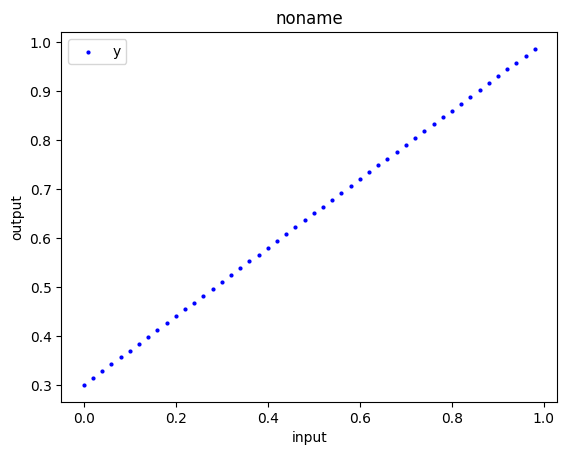

In [6]:
def plot(x, y, color = "blue", legend = 'y', title='noname', xlabel='input', ylabel='output'):
    plt.scatter(x, y, c=color, s=4, label=legend)
    plt.legend(loc="upper left")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

plot(X, y)

数据集准备好了之后，按惯例需要将总数据集拆分为 2 部分：
1. 用于训练的数据集，大约占总数据集的 80%；
2. 用于验证的数据集，大约占总数据集的 20%；

**拆分数据集**

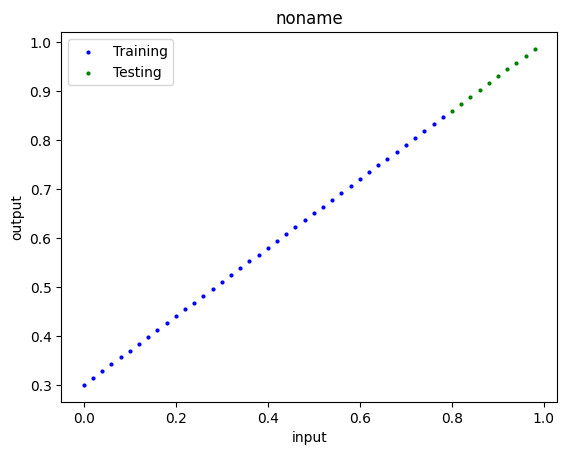

In [7]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# 可视化查看两个数据集
plot(X_train, y_train, color="blue", legend="Training")
plot(X_test, y_test, color="green", legend="Testing")

### 2. Build or pick a pretrained model
---
在数据准备完成后，第二部就是关键的模型构建了。

构建模型有 2 种方法：自己新建一个模型，或者使用一个已经过训练的模型。
PyTorch 提供了 `save` 和 `load` 方法可以将训练过的模型进行保存，因此训练过的模型是可以重用的。使用已经训练的模型当然是最省事的，但往往不容易找到正好适合自己具体问题的模型。

模型构建主要有 2 个关键步骤：
1. 为模型选择一个 **loss** 函数和一个 **optimizer**；
2. 编写一个训练循环，迭代地处理训练数据，使用 loss 函数和 optimizer 不停地优化模型。

本例中通过自己创建模型来演示神经网络机器学习的一般流程。PyTorch 为构建神经网络模型主要提供了下列几个主要的模块：
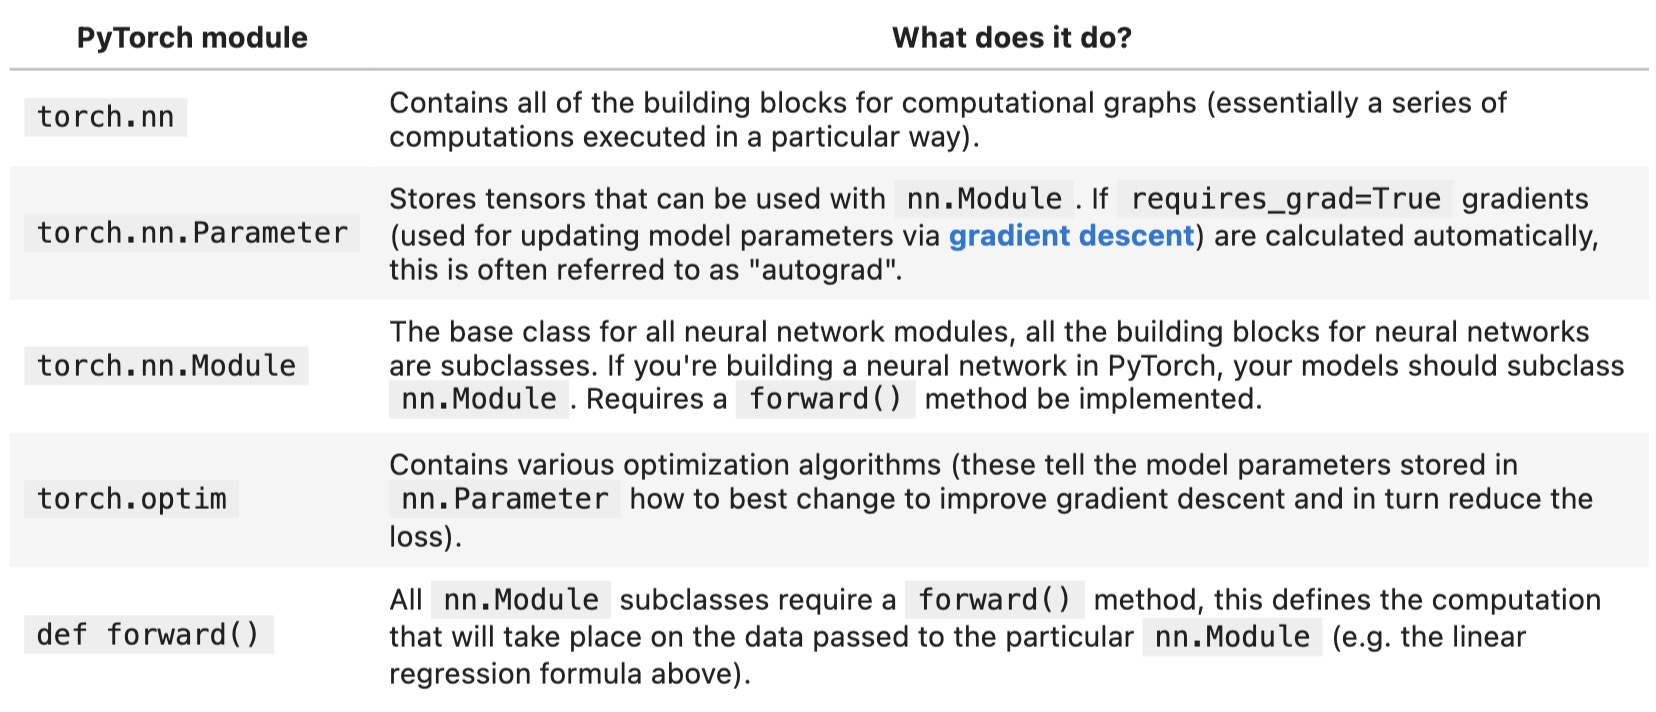


自己创建神经网络模型其实就是自己派生一个 `torch.nn.Module` 的子类，然后实现其中的一些方法。下面的代码演示了一个简单的模型的构建：

In [8]:
# 创建一个线性回归的模型类
# 几乎所有的 PyTorch 对象都是 nn.Module 的子类，nn.Module 是 PyTorch 的乐高积木块
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        """
          nn.Parameter 定义模型参数，在线性回归的模型中，关心的模型参数有：
           1. weight
           2. bias
          使用随机数初始化参数，随着学习过程，参数会被不断调整并越来越接近完美。
        """
        self.weights = nn.Parameter(torch.randn(
                            1,                  # 主需要一个随机数作为参数
                            dtype=torch.float), # 参数类型为浮点数
                            requires_grad=True) # 是否使用梯度下降算法不停地优化参数？

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
          每个 nn.Module 的子类都需要一个 forward() 函数。
          forward 函数是模型的计算函数，参数 x 是输入数据。
          forward 函数在数据学习过程中的每次循环都会被调用，它根据输入数据和当前的模型参数计算出结果。
          forward 的计算结果可能跟实际结果相差很远，但 PyTorch 的 loss 函数和 optimizer 会比较差值
                  并对模型参数进行调整，从而使得每次循环都让模型参数更接近实际。
        """
        return self.weights * x + self.bias  # 线性回归函数

在我们的例子中，虽然我们知道实际的参数是 weight=0.7，bias=0.3，但在真实的情况下，这两个参数是未知的，只有结果数据集是已知的。而**深度学习的目的就是通过对已知的结果数据集进行学习，不停逼近真实的参数，直到参数已经足够接近真实，足以用于对未知数据的预测为止**。

因此，深度学习的过程都是从随机的参数开始，然后在不停的学习循环过程中通过计算数据，比较差距，调整参数，逐渐地让参数变得接近实际的参数。

模型类写好后，可以查看模型中的各个初始参数。下面的代码实例化一个模型，并且查看其参数：

In [9]:
# 为 PyTorch 的随机函数手动设置一个 seed，因为模型中用到了随机函数 randn
torch.manual_seed(42)

# 实例化模型
model_0 = LinearRegressionModel()

# nn.Module.parameters() 函数查看所有的模型参数
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

从上面的输出可以看出来，模型中含有两个参数，分别对应 weight 和 bias，它们被初始化为随机值 0.3367 和 0.1288。
注意我们的模型中并没有实现 `parameters()` 函数，该函数是继承父类 `nn.Module` 的函数。实际上当代码中使用 `nn.Parameter()` 创建模型参数时，该参数就被注册到了 nn.Module 对象中了，我们的子类无需关心其具体的保存方法。

模型参数还可以通过 `state_dict()` 得到：

In [10]:
model_0.state_dict()   # 带名字的模型参数列表

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

有了模型对象我们就可以进行预测。但目前的模型是一个未经过训练的模型，它的参数目前还是随机产生的。因此我们的预测结果可以遇见地跟实际结果有很大的偏差。

由于我们之前已经将数据分解为了训练数据和测试数据，因此我们使用测试数据（X_test）来进行预测，然后将预测结果与真实结果进行对比。

在 PyTorch 中，使用一个模型进行预测只需要给模型输入数据即可：`model_0(X_test)`：

In [11]:
# 使用模型做出预测
with torch.inference_mode(): 
    y_preds = model_0(X_test)

注意代码中使用了 `torch.inference_mode()`, 它的功能是让 PyTorch 进入”预测模式“，以关闭对模型参数的自动调整。
实际上，PyTorch 的学习过程和预测过程都是差不多的，区别仅在于是否在计算过程中使用梯度下降算法（Gradient Descent) 以及反向传播算法（Backpropagation）对参数进行调整。打开 `torch.inference_mode()` 使得 PyTorch 进入纯预测的模式，不再进行学习。

下面的代码通过可视化的方法比较了目前的预测结果和真实结果：

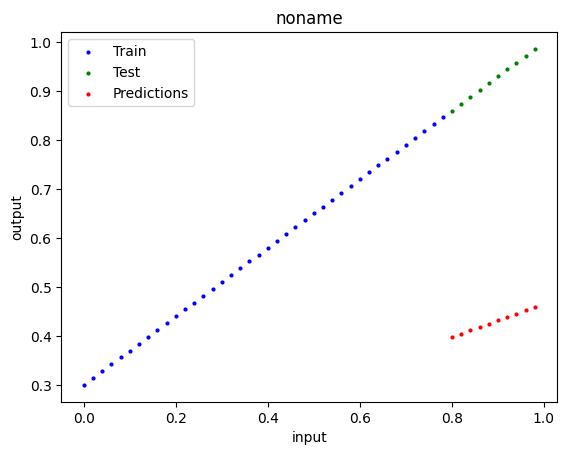

In [12]:
with torch.inference_mode(): 
    y_preds = model_0(X_test)   # 模型根据测试集合的输入数据，预测输出数据并保存到 y_preds
    
    plot(X_train, y_train, legend="Train", color="blue")
    plot(X_test, y_test, legend="Test", color="green")
    plot(X_test, y_preds, legend="Predictions", color="red")
    
    plt.show()

从结果可以看到，目前的预测结果（红色点）与真实的结果（绿色点）相差甚远。为了优化模型，就需要用已知的数据集对模型进行训练。我们的数据集 X_train，y_train 就是用于训练的数据集。

**补充：** 实际上，在深度学习（或者机器学习）的领域，y_train 应该被叫做 "label”。

#### 2.1 Pick a Loss function & Optimizer
---
上一节中定义了一个模型，并且已经可以做出预测。但预测的结果与期待的结果大相径庭，因此目前的模型还是一个完全不可用的模型。为了让模型可以不断地优化自己，我们需要让模型进行学习。

模型学习的过程就是不停调整模型参数（纠偏）的过程，为了使模型可训练，我们需要给模型创建 2 个关键数据结构：
1. **Losss function**，Loss 函数被 PyTorch 用于计算预测结果和实际结果之间的误差，模型根据误差的大小对参数进行调整；
2. **Optimizer**，告诉模型如何调整其模型参数，以降低误差。

PyTorch 提供了多种 loss 函数和 optimizer，我们只需要选择一个适合自己的即可。

就 Loss 函数而言，对于例子中的线性回归问题，使用 MAE（Mean Absolute Error）最为合适，PyTorch 提供 `torch.nn.L1Loss()` Loss 函数。对于其他的问题，例如决策树分类器，PyTorch 提供 `torch.nn.BCELoss()`。

就 Optimizer 而言，PyTorch 也提供了应对多种不同问题的 Optimizers。例如基于梯度下降算法的 `torch.optim.SGD()`, 以及基于 Adam optimizer 的 `torch.optim.Adam()` 等。

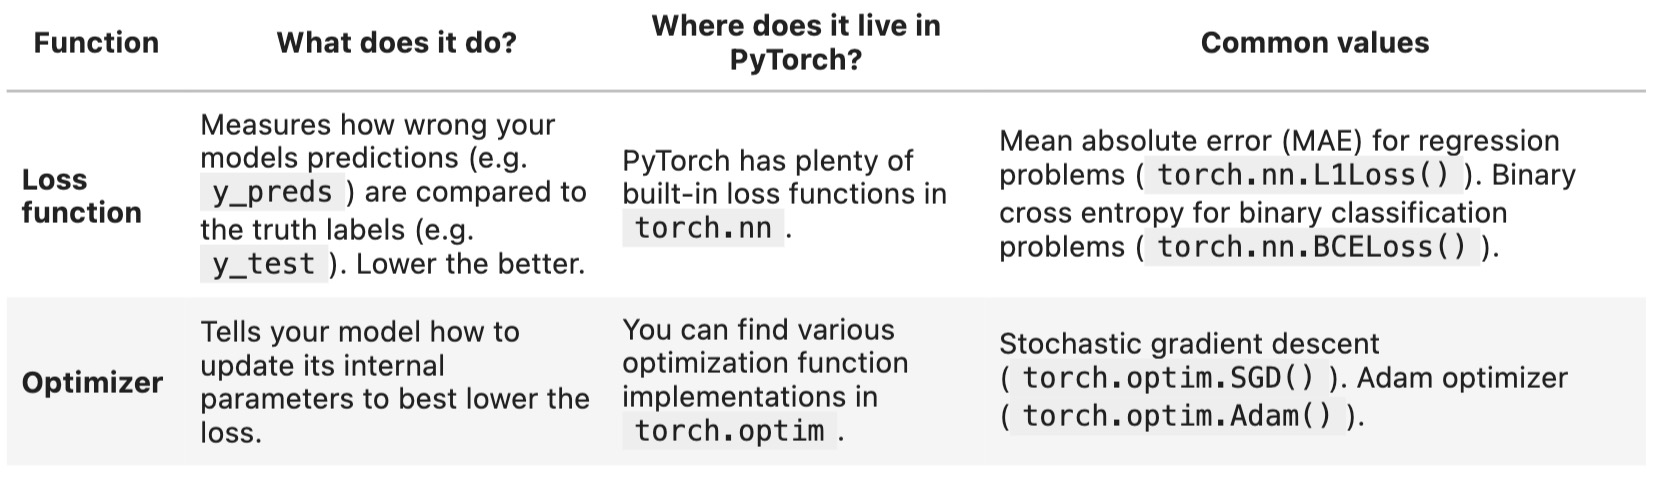

对于我们线性回归的例子，我们最关心的误差是 y_preds 和 y_test 之间的差距：
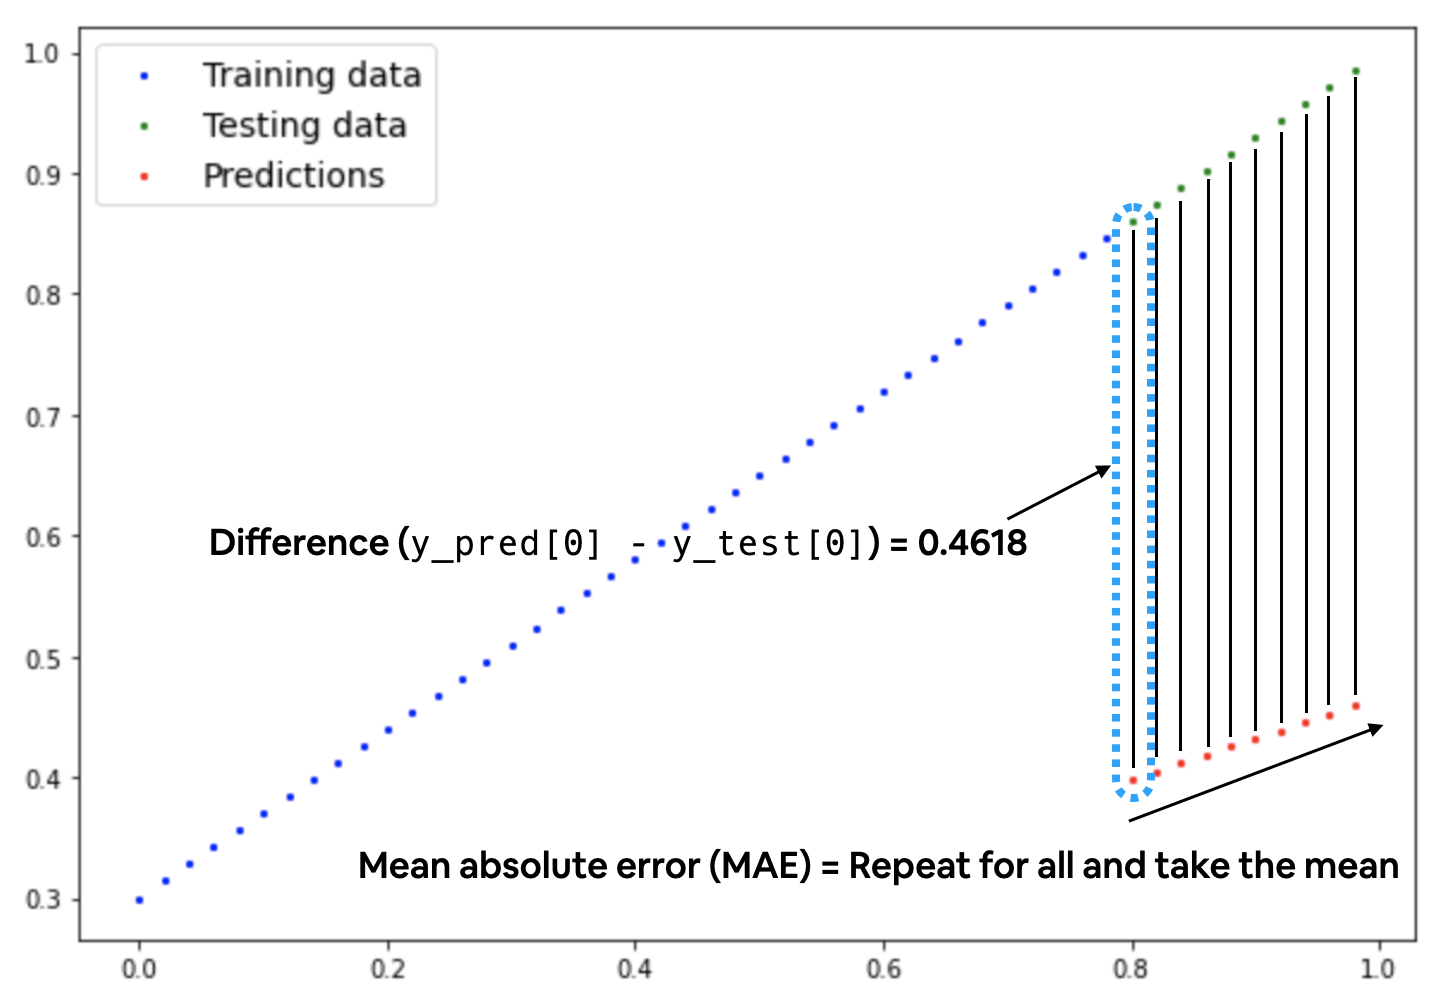

因此最好的针对线性回归的 Loss 函数是 MAE（Mean Absolute Error），即计算预测值和期望值之间的绝对误差平均值（如上图所示）。在 PyTorch 里，MAE 的计算由 `torch.nn.L1Loss` 函数提供，因此我们无需自己实现，只需要直接使用即可。

对于 Optimizer，我们的例子使用 `torch.optim.SGD(params, lr)` 梯度下降算法。SGD 的两个参数分别为：
1. **params**，需要进行优化的参数集合，对应例子中的 weight 和 bias；
2. **lr**，即 "Learning Rate" 的缩写，表示以多大的粒度修改参数。粒度越大则 SGD 对参数的修改越激进，也能越快接近真实的参数；粒度越小则接近真实参数的速度越慢。由于 lr 参数是人为设定的，因此它在机器学习的术语中被叫做一个 “hyperparameter”。一般来讲，lr 的初始值从 `0.01`，`0.001`，`0.0001` 开始。随着时间和阶段不同，lr 可以进行动态调整，比如一开始用比较大的 lr 让模型参数快速接近真实参数，等到快接近的时候可以将 lr 调小，以免参数调整过了头。

下面的代码定义了一个 Loss function，一个 Optimizer：

In [13]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

#### 2.2 Build a training loop
---
定义好了 Loss function 和 Optimizer 之后，就可以用它们对模型进行训练。
模型训练的过程实际就是一个循环结构，将训练数据输入给模型，然后执行一个 “预测->计算偏差->修改参数” 的循环，直到训练效果满意为止。

训练数据使用之前预分配的 80% 的已知数据（X_train），下面的代码实现了一个训练循环：

In [14]:
# 使用多次循环训练模型
epochs = 100
for epoch in range(epochs):
    # 设置模型进入训练模式（这个也是模型的默认模式）
    model_0.train()
    
    # 1. 用模型进行预测，预测过程的核心是调用模型的 forward() 函数
    y_preds = model_0(X_train)
    
    # 2. 计算预测值与期望值之间的偏差
    loss = loss_fn(y_preds, y_train)
    
    # 3. 将 optimizer 的梯度清零（默认情况下梯度是累积的）
    optimizer.zero_grad()
    
    # 4. 根据前面计算的偏差（loss）执行反向传播算法（backproagation）
    #    其结果是对每一个带有 requires_grad=True 的模型参数计算梯度（gradient）
    loss.backward()
    
    # 5. 执行梯度下降算法，根据 loss.backward() 计算出的梯度，修改模型参数的值
    optimizer.step()

在训练时，我们通过多次循环，一遍又一遍地对模型进行训练。理想情况下，模型参数每经过一次训练（调整）后都会向正确的方向前进一小步，使得后续的预测越来越接近真实的数据。


👀 **注意：**

---

梯度下降和反向传播两个算法是深度学习中的两个核心算法，本例中所使用的 PyTorch 提供的 Loss function 和 Optimizer 就实现了这两个算法。这两个算法背后的数学原理可以参考下面的两个视频：
[Backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=253s)
[Gradient Descent](https://www.youtube.com/watch?v=IHZwWFHWa-w&t=213s)

---

### 3. 验证循环

为了在每次训练后都检查一下训练的结果，在训练循环中一般还会包含一个“验证循环”。验证循环的作用其实就是跟前面的预测类似，即使用模型做出预测，然后验证其偏差。理想情况下，每轮训练都会缩小预测值与期望值的偏差。

验证循环的写法一般如下：

In [ ]:
for epoch in range(epochs):
    """ 训练循环的代码 """
    
    ### 验证循环开始 ###
    
    # 将模型设置为 “验证模式”，验证模式会关闭与训练相关的一些功能
    model_0.eval()
    
    # inference_mode 关闭梯度跟踪等与预测无关的功能
    with torch.inference_mode():
        test_preds = model_0(X_test)  # 调用 forward() 使用测试数据集进行预测
        test_loss = loss_fn(test_preds, y_test) # 计算 loss
    
    # 每 10 次训练就打印一次验证结果，理想情况应该看到预测结果越来越接近期望值，loss 越来越小
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | MAE Training Loss: {loss} | MAE Test Loss: {test_loss}")

将前面的代码整合起来之后，形成一个完整的训练循环：

In [20]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 10 | MAE Train Loss: 0.021020209416747093 | MAE Test Loss: 0.04819049686193466 
Epoch: 20 | MAE Train Loss: 0.01758546754717827 | MAE Test Loss: 0.04060482233762741 
Epoch: 30 | MAE Train Loss: 0.014155392535030842 | MAE Test Loss: 0.03233227878808975 
Epoch: 40 | MAE Train Loss: 0.010716588236391544 | MAE Test Loss: 0.024059748277068138 
Epoch: 50 | MAE Train Loss: 0.0072835348546504974 | MAE Test Loss: 0.016474086791276932 
Epoch: 60 | MAE Train Loss: 0.003851778106763959 | MAE Test Loss: 0.008201557211577892 
Epoch: 70 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 


可以看出来，loss 越来越小，此时观察模型参数 `model_0.state_dict()`，可以看到模型参数与真实的参数（weight=0.7，bias=0.3）越来越接近了。

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### 4. Fit the model to the data and make a predict
---
从上面代码的输出来看，Loss 越来越小，意味着模型经过 100 次训练，逐渐与真实的参数接近了。此时使用该模型进行预测，结果应该比未经训练时要好很多：

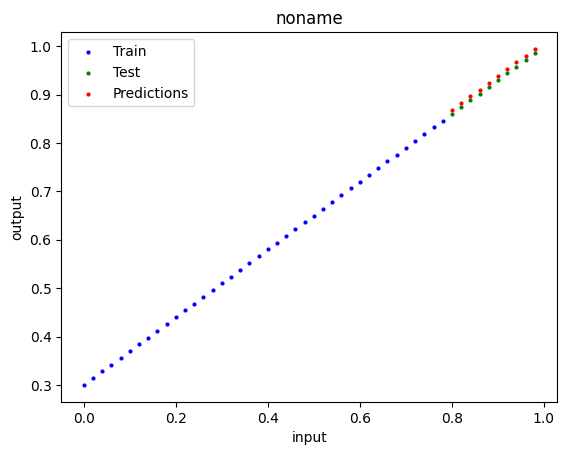

In [22]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
    
    plot(X_train, y_train, legend="Train", color="blue")
    plot(X_test, y_test, legend="Test", color="green")
    plot(X_test, y_preds, legend="Predictions", color="red")
    
    plt.show()

从输出的图像来看，预测值（红点）与期望值（绿点）的确是越来越接近了。这就是一个良好的学习过程。如果要进一步缩小偏差，应该增加循环的次数（epochs），或者增加训练用的数据量。

### 5. Save and reload PyTorch model
---
经过训练的模型可以被保存下来供下次直接使用。PyTorch 提供了下列的方法来保存和载入模型：

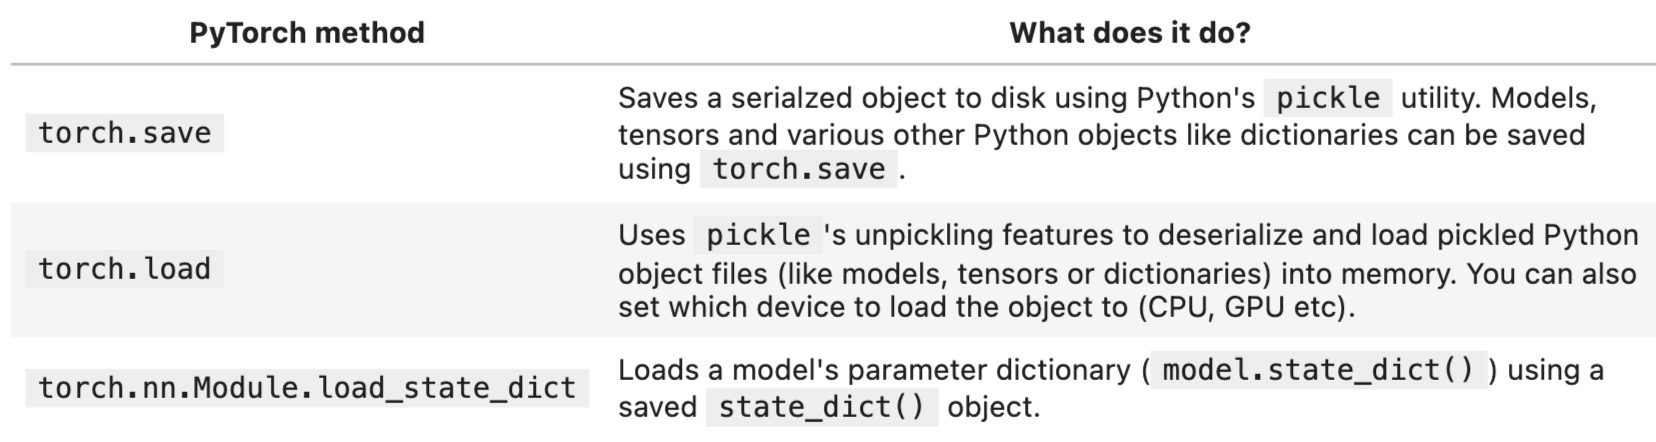


在保存 Model 的时候有 2 个选择，一是只保存模型的参数，即 `state_dict()`，另一种是保存整个模型。
只保存模型参数有几个好处：
1. 保存的数据较少，占用更少的磁盘空间；
2. 更安全，只保存数据，不保存算法，使得载入和运行模型更加安全；
3. 只保存参数字典，可以将模型参数用在其他的模型对象上，而不与具体模型绑定。

由于上述的这些好处，因此只保存模型参数是 PyTorch 建议的模型保存方法。

**仅保存模型参数**

下面的代码使用 `torch.save(obj, f)` 方法演示如何保存模型参数。其中参数 `obj` 即 `state_dict()` 对象，`f` 是一个打开的文件对象，或者是一个路径对象（Path 对象）。

In [23]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


模型文件的扩展名建议是 `.pt` 或者 `.pth`，本例中使用了 `.pth`。上述代码执行后，在当前目录下创建了 `models` 子目录，其下放置了我们的模型文件：
```bash
$ ls models/
01_pytorch_workflow_model_0.pth
```

下面的代码使用 `torch.nn.Module.load_state_dict()` 来将 `state_dict()` 重新载入到模型：

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))